In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

def find_approx_n(x):
    a = x
    n = 1

    while abs(a) > np.spacing(x):
        a = a * (-1) * (x ** 2) / (2 * n * (2 * n + 1))
        n += 1
        
    return n
        
def approx_sin(x):
    sin = 0
    
    for i in range(find_approx_n(x)):
        sin += ((-1) ** i) * (x ** (2 * i + 1)) / np.math.factorial(2 * i + 1)
        
    return sin

def absolute_error(x):
    return abs(approx_sin(x) - np.sin(x))


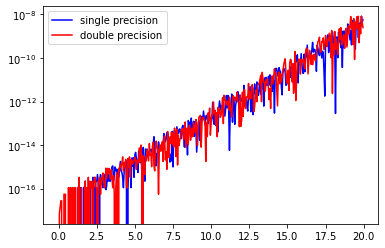

In [7]:
#single precision numbers
start = np.float32(1.0)
stop = np.float32(20.0)
step = np.float(0.05)

X1 = np.arange(start, stop, step)
Y1 = [absolute_error(x) for x in X1]

#double precision numbers
X2 = np.arange(0.0, 20.0, 0.05)
Y2 = [absolute_error(x) for x in X2]

#plot graphics
plt.plot(X1, Y1, color='blue', label='single precision')
plt.plot(X2, Y2, color='red', label='double precision')
plt.yscale('log')
plt.legend()

plt.show()

Математика происходящего:

Разложение синуса в ряд Тейлора:

$\sin{x} = \sum\limits_{n=0}^{\infty} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!}$

Теперь заметим, что:

$\sin{x} = \sum\limits_{n=0}^{\infty} a_n$, где $a_0 = x$ и $a_k = - \frac{x^2}{2k(2k+1)}a_{k-1}$

Для того, чтобы найти подходящее $N$ нужно, чтобы выполнялось: $a_N < \epsilon$

Тогда наш синус мы будем находить таким образом:

$\sin{x} = \sum\limits_{n=0}^{N} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!}$